This is some interesting maths...

$\sum{}_{i=1}^{n} i = \frac{n(n+1)}{2}$

In [1]:
#imports
# %matplotlib widget
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import display_markdown
import datetime
from datetime import datetime as dt
from numpy import nan
from import_OMNI import read_OMNI, nan_value
from import_ACE import read_ACE
from import_cdaweb import read_CDAWeb
from entropy import H, MI, CMI, entropy_matrix
from storm_selection import findSeq



In [2]:
df = read_OMNI(
    filepath="../OMNI/datasets/test_2.txt",
    formatpath="../OMNI/data_format/test_2_format.txt",
)
print(list(df))


c:\Users\Aarnav\Downloads\UROP2024\UROP2024\src\import_OMNI.py:39: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


['Datetime', 'Field', 'BX', 'BY', 'BZ', 'BY, (GSM)', 'BZ, (GSM)', 'RMS', 'RMS, nT', 'Speed', 'Vx', 'Vy', 'Vz', 'Proton', 'Proton, K', 'Na/Np', 'Flow', 'Electric', 'Plasma', 'Alfven', 'Magnetosonic', 'AE-index', 'AL-index', 'AU-index', 'SYM/D', 'SYM/H', 'ASY/D', 'ASY/H']


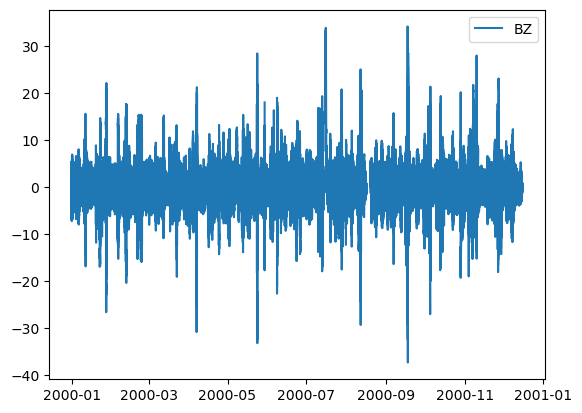

In [3]:
# for column in list(df)[1:]:
    # plt.plot(df["Datetime"], df[column], label=column)
plt.plot(df["Datetime"], df["BZ"], label="BZ")
# plt.plot(df["Datetime"], df["SYM/H"], label="SYM/H")
# plt.hist(df["SYM/H"], 150)
plt.legend()
plt.show()

In [4]:
def markdown_entropy_matrix(df):
    em = entropy_matrix(df)

    display_markdown(
f'''| |{"|".join(df.columns[1:])}|
{"".join(["|:-"] * len(df.columns))}|
{"\n".join([f"|{column_name}|{"|".join(map(lambda x: "%.2f" % x, em[i]))}|" for i, column_name in enumerate(df.columns[1:])])}
|Number of datapoints|{"|".join([str(len(df[column])) for column in df.columns[1:]])}|
''',
    raw = True
    )

In [5]:
# markdown_entropy_matrix(df)

c:\Users\Aarnav\Downloads\UROP2024\UROP2024\src\import_OMNI.py:39: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


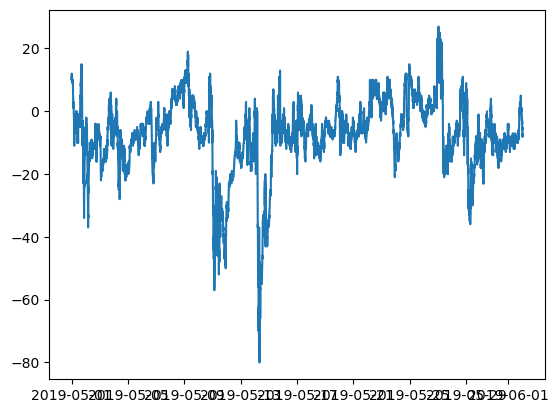

In [6]:
df = read_OMNI(
    filepath="../OMNI/datasets/2019_March_data.txt",
    formatpath="../OMNI/data_format/2019_March_data_format.txt",
)
plt.plot(df["Datetime"], df["SYM/H"], label="SYM/H")
plt.show()

In [7]:
lower_thresh, upper_thresh = 20, 50
inds, ranges=findSeq(-df["SYM/H"],lower_thresh,upper_thresh,6*60, return_ranges=True)
# plt.plot(df["Datetime"], df["SYM/H, nT"])

Min / max thresholds are: 20.00 , 50.00
3 sequences found.
Joining two sequences next to each other (within the threshold).


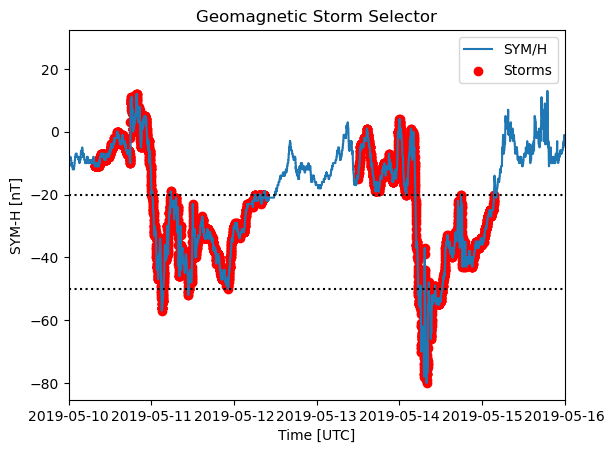

In [8]:
plt.figure()
plt.plot(df["Datetime"], df["SYM/H"], label="SYM/H")
plt.scatter(df["Datetime"].iloc[inds],df["SYM/H"].iloc[inds],color='r',label='Storms')
plt.axhline(-lower_thresh,color='k',linestyle=':')
plt.axhline(-upper_thresh,color='k',linestyle=':')
plt.title('Geomagnetic Storm Selector')
plt.xlabel('Time [UTC]')
plt.ylabel('SYM-H [nT]')
plt.xlim(datetime.datetime(2019, 5, 10), datetime.datetime(2019, 5, 16))
plt.legend()
plt.show()

In [9]:
storm_entropies = [H(df["SYM/H"].iloc[range(storm[0], storm[1])]) for storm in ranges]

print(f"Nominal SYM/H entropy: {H(df["SYM/H"])}")
print(f"Storm SYM/H entropies: {storm_entropies} \nAverage storm entropy (per storm): {sum(storm_entropies)/len(storm_entropies)}")
print(f"Storm entropies calculated taking storms as a set of datapoints: {H(df["SYM/H"].iloc[inds])}")
# we can initially discern a large increase in information describing SYM/H
markdown_entropy_matrix(df.iloc[inds])
markdown_entropy_matrix(df)

Nominal SYM/H entropy: 5.3815728793369155
Storm SYM/H entropies: [5.5921725345894595, 5.818315309802384] 
Average storm entropy (per storm): 5.705243922195922
Storm entropies calculated taking storms as a set of datapoints: 5.987156034385624


| |AE-index|AL-index|AU-index|SYM/D|SYM/H|ASY/D|ASY/H|
|:-|:-|:-|:-|:-|:-|:-|:-|
|AE-index|6.53|3.00|2.49|0.99|1.91|1.67|1.86|
|AL-index|3.00|6.09|1.97|0.88|1.74|1.49|1.67|
|AU-index|2.49|1.97|6.49|0.89|1.72|1.47|1.72|
|SYM/D|0.99|0.88|0.89|3.96|1.16|1.00|1.08|
|SYM/H|1.91|1.74|1.72|1.16|5.99|1.66|1.85|
|ASY/D|1.67|1.49|1.47|1.00|1.66|5.75|1.67|
|ASY/H|1.86|1.67|1.72|1.08|1.85|1.67|6.02|
|Number of datapoints|5318|5318|5318|5318|5318|5318|5318|


| |AE-index|AL-index|AU-index|SYM/D|SYM/H|ASY/D|ASY/H|
|:-|:-|:-|:-|:-|:-|:-|:-|
|AE-index|5.14|1.83|1.43|0.24|0.47|0.39|0.54|
|AL-index|1.83|4.58|0.78|0.21|0.43|0.35|0.48|
|AU-index|1.43|0.78|5.46|0.22|0.47|0.35|0.50|
|SYM/D|0.24|0.21|0.22|3.27|0.24|0.22|0.21|
|SYM/H|0.47|0.43|0.47|0.24|5.38|0.40|0.52|
|ASY/D|0.39|0.35|0.35|0.22|0.40|5.18|0.38|
|ASY/H|0.54|0.48|0.50|0.21|0.52|0.38|5.11|
|Number of datapoints|46080|46080|46080|46080|46080|46080|46080|


In [10]:
# evaluating average entropies of all stats in a storm
stormy_H = np.array([H(df[column].iloc[inds]) for column in list(df)[1:]])

nominal_H =  np.array([H(df[column]) for column in list(df)[1:]])

stormy_H - nominal_H

array([1.38648473, 1.50780848, 1.03185059, 0.69040972, 0.60558316,
       0.57245759, 0.91549906])

In [11]:
def find_bin_num(func, default = 100):
    bin_num = default
    while not np.isclose(func(bin_num), func(bin_num-50)):
        bin_num += 100
    return bin_num


In [12]:
def gradient_desc(f, initial = 100, step_size = 100, weight = 1):
    x = initial
    grad = f(x+step_size) - f(x)
    while not np.isclose(grad,0):
        print(x, grad)
        x += int(grad*step_size*weight)
        grad = f(x+step_size) - f(x)
        
    return x+step_size
   

In [13]:
# [find_bin_num(lambda x: H(df[column], bins=x)) for column in list(df)[1:]]

In [14]:
df2 = read_ACE("../ACE/ACE_Browse_Data.txt")
df2.columns

Index(['ACE_epoch_time', 'B_rtn_r_MAG', 'B_rtn_t_MAG', 'B_rtn_n_MAG',
       'B_rtn_theta_MAG', 'B_rtn_phi_MAG', 'B_gse_x_MAG', 'B_gse_y_MAG',
       'B_gse_z_MAG', 'B_gse_theta_MAG', 'B_gse_phi_MAG', 'B_gsm_x_MAG',
       'B_gsm_y_MAG', 'B_gsm_z_MAG', 'B_gsm_theta_MAG', 'B_gsm_phi_MAG',
       'B_magnitude_MAG'],
      dtype='object')

In [15]:
markdown_entropy_matrix(df2)

| |B_rtn_r_MAG|B_rtn_t_MAG|B_rtn_n_MAG|B_rtn_theta_MAG|B_rtn_phi_MAG|B_gse_x_MAG|B_gse_y_MAG|B_gse_z_MAG|B_gse_theta_MAG|B_gse_phi_MAG|B_gsm_x_MAG|B_gsm_y_MAG|B_gsm_z_MAG|B_gsm_theta_MAG|B_gsm_phi_MAG|B_magnitude_MAG|
|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|
|B_rtn_r_MAG|6.25|0.29|0.15|0.25|1.81|6.05|0.29|0.15|0.26|1.80|6.05|0.28|0.14|0.27|1.79|0.50|
|B_rtn_t_MAG|0.29|5.88|0.18|0.25|1.92|0.29|3.80|0.18|0.24|1.80|0.29|2.12|0.18|0.19|1.37|0.75|
|B_rtn_n_MAG|0.15|0.18|5.59|2.32|0.19|0.15|0.17|3.17|1.97|0.18|0.15|0.18|1.48|1.15|0.19|0.49|
|B_rtn_theta_MAG|0.25|0.25|2.32|7.24|0.31|0.25|0.24|1.96|3.28|0.31|0.25|0.20|1.11|1.43|0.32|0.18|
|B_rtn_phi_MAG|1.81|1.92|0.19|0.31|7.53|1.81|1.79|0.18|0.31|5.16|1.81|1.35|0.18|0.33|3.52|0.23|
|B_gse_x_MAG|6.05|0.29|0.15|0.25|1.81|6.25|0.29|0.15|0.26|1.80|6.25|0.28|0.14|0.27|1.79|0.50|
|B_gse_y_MAG|0.29|3.80|0.17|0.24|1.79|0.29|5.86|0.17|0.25|1.91|0.29|2.23|0.17|0.19|1.40|0.74|
|B_gse_z_MAG|0.15|0.18|3.17|1.96|0.18|0.15|0.17|5.54|2.32|0.18|0.15|0.17|1.60|1.22|0.18|0.49|
|B_gse_theta_MAG|0.26|0.24|1.97|3.28|0.31|0.26|0.25|2.32|7.24|0.31|0.26|0.20|1.19|1.55|0.32|0.19|
|B_gse_phi_MAG|1.80|1.80|0.18|0.31|5.16|1.80|1.91|0.18|0.31|7.53|1.80|1.39|0.18|0.32|3.64|0.23|
|B_gsm_x_MAG|6.05|0.29|0.15|0.25|1.81|6.25|0.29|0.15|0.26|1.80|6.25|0.28|0.14|0.27|1.79|0.50|
|B_gsm_y_MAG|0.28|2.12|0.18|0.20|1.35|0.28|2.23|0.17|0.20|1.39|0.28|5.80|0.15|0.25|1.91|0.70|
|B_gsm_z_MAG|0.14|0.18|1.48|1.11|0.18|0.14|0.17|1.60|1.19|0.18|0.14|0.15|5.36|2.28|0.17|0.50|
|B_gsm_theta_MAG|0.27|0.19|1.15|1.43|0.33|0.27|0.19|1.22|1.55|0.32|0.27|0.25|2.28|7.29|0.32|0.19|
|B_gsm_phi_MAG|1.79|1.37|0.19|0.32|3.52|1.79|1.40|0.18|0.32|3.64|1.79|1.91|0.17|0.32|7.54|0.22|
|B_magnitude_MAG|0.50|0.75|0.49|0.18|0.23|0.50|0.74|0.49|0.19|0.23|0.50|0.70|0.50|0.19|0.22|5.55|
|Number of datapoints|105120|105120|105120|105120|105120|105120|105120|105120|105120|105120|105120|105120|105120|105120|105120|105120|


In [16]:
mag_df, swepam_df = read_CDAWeb("../CDAWeb/ac_h0s_swe_20210101000054_20210131235945.cdf", mag_file_path="../CDAWeb/ac_h3s_mfi_20210101000000_20210131235959.cdf")
mag2 = mag_df.resample("64s", on="Epoch", label="left").mean().reset_index()


In [17]:
L1_data = pd.concat([mag2, swepam_df[swepam_df.columns[1:]]], axis=1)
# L1_data.set_index('Epoch', inplace=True)
L1_data.columns, L1_data.min()["Epoch"], L1_data.max()["Epoch"]

(Index(['Epoch', 'Bx (GSM)', 'By (GSM)', 'Bz (GSM)', 'Np', 'Vp', 'Tpr'], dtype='object'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-01-31 23:58:56'))

In [50]:
rolling_data = L1_data.rolling(window="30D", on="Epoch")
window_width = 0

len_rolling_dates = 0
num_available = 0
for convolution in rolling_data:
    if convolution.shape[0] > window_width:
        window_width = convolution.shape[0]
        num_available = 0
    num_available += 1
    len_rolling_dates += 1

MI_matrices = []
starting = len_rolling_dates - num_available
for i, convolution in enumerate(rolling_data):
    if i < starting:
        continue
    if not starting2:
        starting2 = i
    if i % 10 == 0:
        print(f"{100*(i-starting)/(num_available):.2f}% complete")
    MI_matrix = np.array([[MI(convolution[col_i], df[col_j]) for col_i in convolution.columns] for col_j in df.columns[1:]])
    MI_matrices.append(MI_matrix)
MI_matrices = np.array(MI_matrices)
# print(window_width)

0.07% complete
0.81% complete
1.55% complete
2.29% complete
3.03% complete
3.77% complete
4.52% complete
5.26% complete
6.00% complete
6.74% complete
7.48% complete
8.22% complete
8.96% complete
9.70% complete
10.44% complete
11.18% complete
11.92% complete
12.66% complete
13.40% complete
14.14% complete
14.88% complete
15.62% complete
16.36% complete
17.10% complete
17.84% complete
18.58% complete
19.32% complete
20.06% complete
20.80% complete
21.54% complete
22.28% complete
23.02% complete
23.76% complete
24.50% complete
25.24% complete
25.98% complete
26.72% complete
27.46% complete
28.20% complete
28.94% complete
29.68% complete
30.42% complete
31.16% complete
31.90% complete
32.64% complete
33.38% complete
34.12% complete
34.86% complete
35.60% complete
36.34% complete
37.08% complete
37.82% complete
38.56% complete
39.30% complete
40.04% complete
40.78% complete
41.52% complete
42.26% complete
43.01% complete
43.75% complete
44.49% complete
45.23% complete
45.97% complete
46.71%

In [21]:
MI_matrices.shape, convolution.columns, df.columns[1:] # just checking everything is working as expected 

((1351, 7, 6),
 Index(['Bx (GSM)', 'By (GSM)', 'Bz (GSM)', 'Np', 'Tpr', 'Vp'], dtype='object'),
 Index(['AE-index', 'AL-index', 'AU-index', 'SYM/D', 'SYM/H', 'ASY/D', 'ASY/H'], dtype='object'))

In [25]:
plt.figure()
plt.plot([dataset.mean()["Epoch"] if i > starting else np.nan for i, dataset in enumerate(rolling_data)], MI_matrices[:, -3, 2]) # first number indexes the OMNI column, second indexes the ACE column
print(MI_matrices[:, -3, 2])
plt.show() # attempt at plotting MI between Bz and SMH/H

KeyError: 'Column not found: slice(40499, None, None)'

<Figure size 640x480 with 0 Axes>

In [ ]:
test_mag, test_swe = read_CDAWeb("../CDAWeb/ac_h0s_swe_20190101000053_20190529235924.cdf", mag_file_path="../CDAWeb/ac_h3s_mfi_20190101000000_20190529235959.cdf")